## Importing libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from itertools import permutations
import timeit
import pandas as pd

### Funtion to convert permutation to permutation matrix and vise-versa 

In [2]:
def per_to_mat(p):
  a=np.zeros((len(p),len(p)))
  for i in range(len(p)):
    a[i][p[i]]=1
  return a
def mat_to_per(p):
  l=list()
  for i in range(len(p)):
    l.append(list(p[i,:]).index(max(p[i,:])))
  return l

### Logistic Function

In [3]:
def logistic_(x):
  return 1/(1+np.exp(-x))
logistic=np.vectorize(logistic_)

### Function to calculate time

In [4]:
def time(p,per=True):
  if not per:
    p=mat_to_per(p)
  time_before=[[0]*N]
  for i in range(M):
    l=list()
    before=time_before[i]
    l.append(before[0]+T[i][p[0]])
    for j in range(1,N):
      if before[j]<=l[-1]:
        l.append(l[-1]+T[i][p[j]])
      else:
        l.append(before[j]+T[i][p[j]])
    time_before.append(l)
  return -time_before[-1][-1]

### Row wise, Column wise, Element wise conversion to permutation matrix

In [5]:
def permut(p):
  # p=p_.copy()
  length=len(p)
  l=list(range(length))
  ans=np.zeros((length,length))
  for i in range(length):
    col=[p[j][i] for j in l]
    ind=list(p[:,i]).index(max(col))
    # print(p[:,i],col,l,ind)
    l.remove(ind)
    p[ind,:]=-1000000
    ans[ind][i]=1

  return ans
def permut_(p):
  # p=p_.copy()
  length=len(p)
  l=list(range(length))
  ans=np.zeros((length,length))
  for i in range(length):
    col=[p[i][j] for j in l]
    ind=list(p[i,:]).index(max(col))
    # print(p[:,i],col,l,ind)
    l.remove(ind)
    p[:,ind]=-1000000
    ans[i][ind]=1

  return ans

def permut__(p):
  # p=p_.copy()
  length=len(p)
  
  ans=np.zeros((length,length))
  for _ in range(length):
    # maxValue = np.amax(p)
    result = np.where(p == np.amax(p))
    listOfCordinates = list(zip(result[0], result[1]))[0]
    # travese over the list of cordinates
    i=listOfCordinates[0]
    j=listOfCordinates[1]
    p[:,j]=-1000000
    p[i,:]=-1000000
    ans[i][j]=1
    
  return ans

### Trial 1: simple problem with known solution 

In [6]:
# Machine,jobs=3,4
M,N=3,4
T=np.array([ [5, 7 ,3 ,1],[2 ,4 ,5, 8],[6 ,2 ,4 ,3]]) # M X N
number_ff=2
pos=list()
iter=50
intensity=list()
gamma=1
alpha=1
beta=2
best=-1000000
for i in range(number_ff):
  temp=random.sample(list(range(N)), N)
  pos.append(per_to_mat(temp))
  intensity.append(time(temp))
  if best<=intensity[-1]:
    best=intensity[-1]
    best_idx=i
global_best=list()
global_best.append(best)  

In [7]:
for k in range(iter):
  for i in range(number_ff):
    temp=np.zeros((N,N))
    for j in range(number_ff):
      if intensity[i]<=intensity[j]:
        rij=np.sqrt(np.sum(np.square(pos[j]-pos[i])))
        temp=temp+beta*np.exp(-gamma*rij**2)*(pos[j]-pos[i])
    # print(temp)
    temp=temp+alpha*np.reshape(np.random.uniform(-.5,.5,N*N),(N,N))
    temp=logistic(temp)
    # print(temp)
    pos_new=permut(temp)
    pos[i]=pos_new
    intensity_new=time(pos_new,False)
    if intensity_new>=best:
      best=intensity_new
      best_idx=i
  global_best.append(best)  

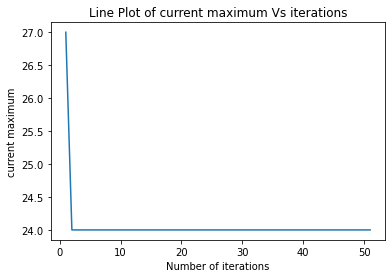

In [9]:
plt.title('Line Plot of current maximum Vs iterations')
plt.xlabel('Number of iterations')  
plt.ylabel('current maximum')
plt.plot(list(range(1,len(global_best)+1)),-np.array(global_best))

### Trail 2:- Increasing the number of jobs and machine

In [10]:
random.seed(10)
M,N=7,9
# Machine,jobs=7,9
T=np.array(np.reshape(np.random.randint(1, 200 + 1,M*N),(M,N)))

In [12]:
start = timeit.default_timer()
number_ff=10
pos=list()
iter=1000
intensity=list()
gamma=.2
alpha=.5
beta=2
theta=1
best=-1000000
for i in range(number_ff):
  temp=random.sample(list(range(N)), N)
  pos.append(per_to_mat(temp))
  intensity.append(time(temp))
  if best<=intensity[-1]:
    best=intensity[-1]
    best_idx=i
global_best=list()
global_best.append(best)  


In [13]:
for k in range(iter):
  for i in range(number_ff):
    temp=np.zeros((N,N))
    for j in range(number_ff):
      if intensity[i]<=intensity[j]:
        rij=np.sqrt(np.sum(np.square(pos[j]-pos[i])))
        temp=temp+beta*np.exp(-gamma*rij**2)*(pos[j]-pos[i])
    # print(temp)
    temp=temp+alpha*np.reshape(np.random.uniform(-.5,.5,N*N),(N,N))
    # print(temp)
    temp=logistic(temp)
    # print(temp)
    pos_new=permut__(temp)
    pos[i]=pos_new
    intensity_new=time(pos_new,False)
    alpha=alpha*theta
    if intensity_new>=best:
      best=intensity_new
      best_idx=i
  global_best.append(best) 
stop = timeit.default_timer() 

1801
Time:  6.605579390000003


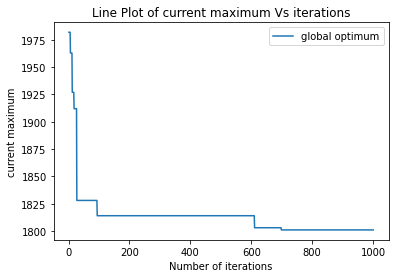

In [14]:
plt.title('Line Plot of current maximum Vs iterations')
plt.xlabel('Number of iterations')  
plt.ylabel('current maximum')
plt.plot(list(range(1,len(global_best)+1)),-np.array(global_best))
print(-global_best[-1])
plt.legend(['global optimum'])
plt.savefig('my_plot.jpeg')


print('Time: ', stop - start) 

In [15]:
start = timeit.default_timer()
perm = permutations(list(range(N))) 
min=1000000

for i in list(perm): 
    x=-time(list(i))
    if x<=min:
      min=x
stop = timeit.default_timer()
print(min)
print('Time: ', stop - start) 

1761
Time:  20.01027815399999


### Final Trail: A complete comparison between naive and firefly approach

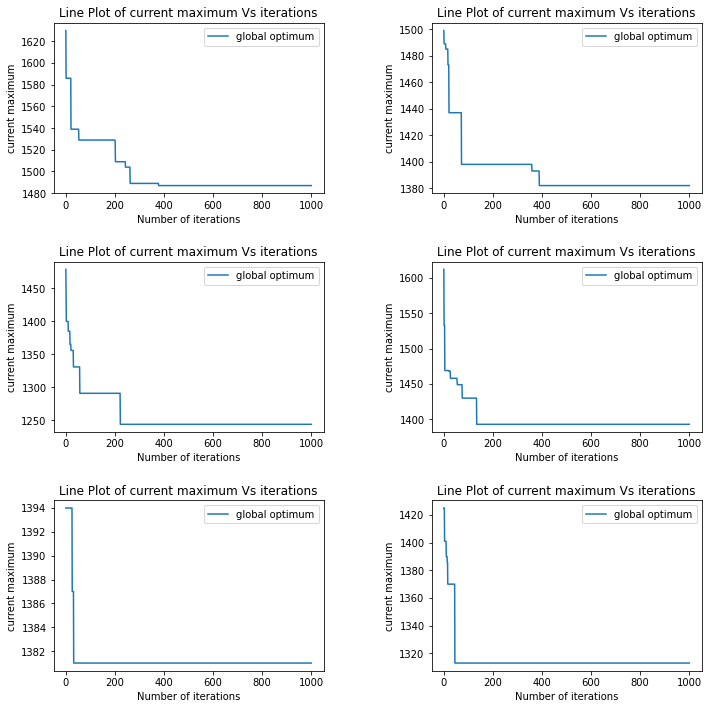

In [ ]:
random.seed(10)
comp=list()
fig, ax = plt.subplots(3, 2, figsize=(10,10))
for _ in range(6):
  comp_=list()
  M,N=5,9
  T=np.array(np.reshape(np.random.randint(1, 200 + 1,M*N),(M,N)))
  start = timeit.default_timer()
  number_ff=10
  pos=list()
  iter=1000
  intensity=list()
  gamma=.2
  alpha=.5
  beta=2
  theta=1
  best=-1000000
  for i in range(number_ff):
    temp=random.sample(list(range(N)), N)
    pos.append(per_to_mat(temp))
    intensity.append(time(temp))
    if best<=intensity[-1]:
      best=intensity[-1]
      best_idx=i
  global_best=list()
  global_best.append(best)  
  for k in range(iter):
    for i in range(number_ff):
      temp=np.zeros((N,N))
      for j in range(number_ff):
        if intensity[i]<=intensity[j]:
          rij=np.sqrt(np.sum(np.square(pos[j]-pos[i])))
          temp=temp+beta*np.exp(-gamma*rij**2)*(pos[j]-pos[i])
      # print(temp)
      temp=temp+alpha*np.reshape(np.random.uniform(-.5,.5,N*N),(N,N))
      # print(temp)
      temp=logistic(temp)
      # print(temp)
      pos_new=permut__(temp)
      pos[i]=pos_new
      intensity_new=time(pos_new,False)
      # alpha=alpha*theta
      if intensity_new>=best:
        best=intensity_new
        best_idx=i
    global_best.append(best)  

  stop = timeit.default_timer()
  ii=int(_/2)
  jj=_-ii*2
  ax[ii][jj].set_title('Line Plot of current maximum Vs iterations')
  ax[ii][jj].set_xlabel('Number of iterations')  
  ax[ii][jj].set_ylabel('current maximum')
  
  ax[ii][jj].plot(list(range(1,len(global_best)+1)),-np.array(global_best),label="global optimum")
  ax[ii][jj].legend(loc="upper right")
  # ax[_].savefig('my_plot'+str(_)+'.jpeg')
  comp_.extend([-global_best[-1],stop - start])
  start = timeit.default_timer()
  perm = permutations(list(range(N))) 
  min=1000000
  for i in list(perm): 
      x=-time(list(i))
      if x<=min:
        min=x
  stop = timeit.default_timer()
  comp_.extend([min,stop - start])
  comp.append(comp_)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

fig.savefig('full_figure.jpeg')

In [ ]:
pd.DataFrame(comp)

,0,1,2,3
0,1487,5.830360,1471,10.234105
1,1382,5.189431,1360,10.237495
2,1244,5.402667,1244,10.197077
3,1393,5.199275,1365,10.168530
4,1381,5.284294,1381,10.172134
5,1313,5.157406,1286,10.153467
